# Estudo da biblioteca “WordCloud” para criação de nuvens de palavras

Neste estudo vamos analisar  as palavras que aparecem com mais frequência no livro “O Mundo Assombrado Pelos Demônios” de Carl Sagan (https://pt.wikipedia.org/wiki/Carl_Sagan).

Vamos plotar um gráfico com as palavras de maior destaque e criar uma “nuvem” das palavras mais relevantes que apareceram no livro.
Para a criação dessa “nuvem” de palavras vamos usar algumas imagens do próprio Carl Sagan.


    ** O principal objetivo deste notebook é praticar o uso da biblioteca “WordCloud” no python para a criação de uma nuvem de palavras. **


OBS: Se você ainda não leu esta obra, recomendo que o faça. Este é um dos livros mais fantástico já escritos! Nele você vai entender um pouco mais sobre o porquê da importância de adotar uma postura mais cética a respeito de tudo que, à primeira vista, parece fantástico ou sobrenatural. </br>
Como dizia Carl: “Alegações extraordinárias exigem evidências extraordinárias."

O livro usado nesse estudo foi retirado do site: https://archive.org/stream/OMundoAssombradoPelosDemniosCarlSagan/O%20Mundo%20Assombrado%20pelos%20Dem%C3%B4nios%20-%20Carl%20Sagan_djvu.txt

O arquivo de stopwods utilizado neste estudo  está disponível em https://gist.github.com/alopes/5358189. Stop Words by @alopes alopes/stopwords.txt



In [1]:
# import necessary packages
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import os
import glob
from collections import Counter
import pandas as pd

In [2]:
def get_files_dir(dir_path, extension_file='*'):
    return glob.glob(os.path.join(dir_path, extension_file))

In [3]:
def readlines_file(file_name, mode='r'):
    with open(file_name, mode) as f:
        content = f.readlines()
    content = [x.strip() for x in content]

    return content

In [4]:
def read_file(file_name, mode='r'):
    with open(file_name, mode) as f:
        content = f.read()
    return content

In [5]:
def show_wordcloud(text, stopwords, image_mask, name_image_save=None):
    wordcloud = WordCloud(
        background_color='white',
        relative_scaling = .5,
        stopwords=stopwords,
        max_words=3000,
        #max_font_size=40, 
        #scale=3,
        random_state=1,
        mask=image_mask,
        repeat= False,
        contour_width=1, contour_color='steelblue'
    ).generate(text)
    
    if name_image_save is not None:
        # store to file
        wordcloud.to_file("wc_" + name_image_save)

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()
    

In [6]:
# Read text file
text = read_file('./source_files/Livro - O Mundo Assombrado Pelos Demônios Carl Sagan.txt') 
#text

In [7]:
# Total words before removing "stopwords
wc_frq_before =  WordCloud().process_text(text)
print('\nTotal words before removing "stopwords": {}\n'.format(len(wc_frq_before)))


Total words before removing "stopwords": 17182



In [8]:
# Words frequency before removing "stopwords"
wc_frq_counter_before = Counter(wc_frq_before)
print('\nWords frequency before removing "stopwords": {}\n'.format(sum(wc_frq_counter_before.values())))


Words frequency before removing "stopwords": 111228



In [9]:
# Get 20 words most frequent before removing "stopwords"
wc_frq_counter_before.most_common(20)

[('de', 3746),
 ('que', 2622),
 ('da', 1404),
 ('se', 1105),
 ('em', 1038),
 ('para', 1019),
 ('ou', 880),
 ('um', 861),
 ('uma', 828),
 ('os', 780),
 ('na', 709),
 ('não', 660),
 ('como', 648),
 ('mais', 581),
 ('mas', 579),
 ('dos', 493),
 ('ele', 486),
 ('por', 477),
 ('são', 471),
 ('ao', 447)]

In [10]:
# Read stopwords files - stopwords in portuguese
# stopwords are words that will be removed of the analysis
stop_words_list = readlines_file('stopwords_list.txt')
#stop_words_list

In [11]:
# Set stopwowrd
stopwords = set(stop_words_list) 
#stopwords

In [12]:
# Count words frequency 
wc_frq = WordCloud(stopwords= stopwords).process_text(text)
#wc_frq

In [13]:
# Create Couter object
wc_frq_counter = Counter(wc_frq)

In [14]:
# Total words after removed "stopwords"
print('\nTotal words after removed "stopwords": {}c'.format(len(wc_frq_counter.keys())))


Total words after removed "stopwords": 16420c


In [15]:
# words frequency after removed "stopwords"
print('\nWords frequency after removed "stopwords": {}\n'.format(sum(wc_frq_counter.values())))


Words frequency after removed "stopwords": 76424



In [16]:
# Get 40 words most frequent
top_words = wc_frq_counter.most_common(40)
#top_words

In [17]:
# Convert to Dataframe and show first 20
df = pd.DataFrame(top_words, columns=['word', 'frequence'])
df.head(20)

,word,frequence
0,ciência,454
1,sobre,337
2,pessoa,227
3,mundo,220
4,outro,216
5,história,211
6,cientista,202
7,talvez,202
8,alguma,197
9,apena,188


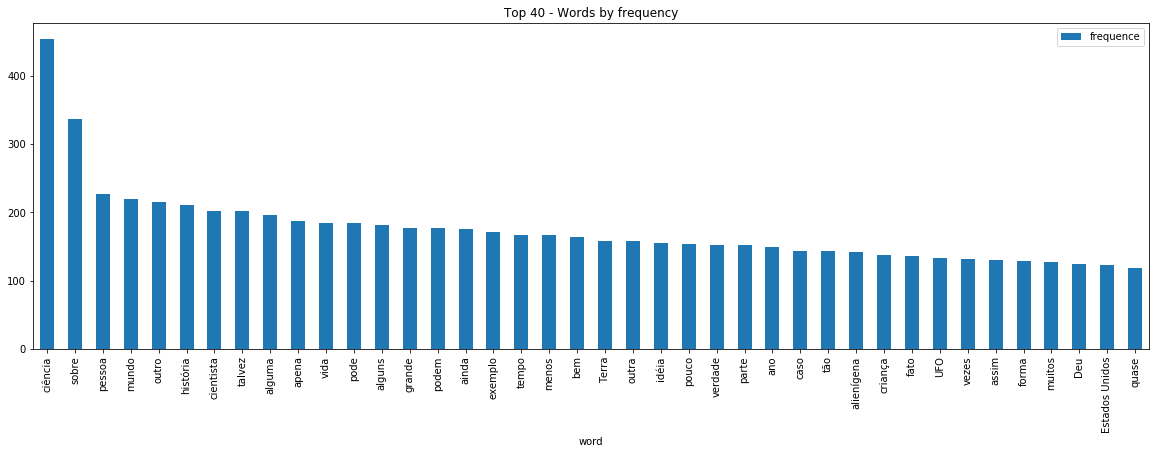

In [18]:
# Plot bar chart of the most frequency words
df.plot.bar(x='word', y='frequence', figsize=(20,6), rot=90, title='Top 40 - Words by frequency');

In [19]:
# Get images mask
images_mask_list = get_files_dir('images_mask')

Mask image name : images_mask/carl_sagan_02.png


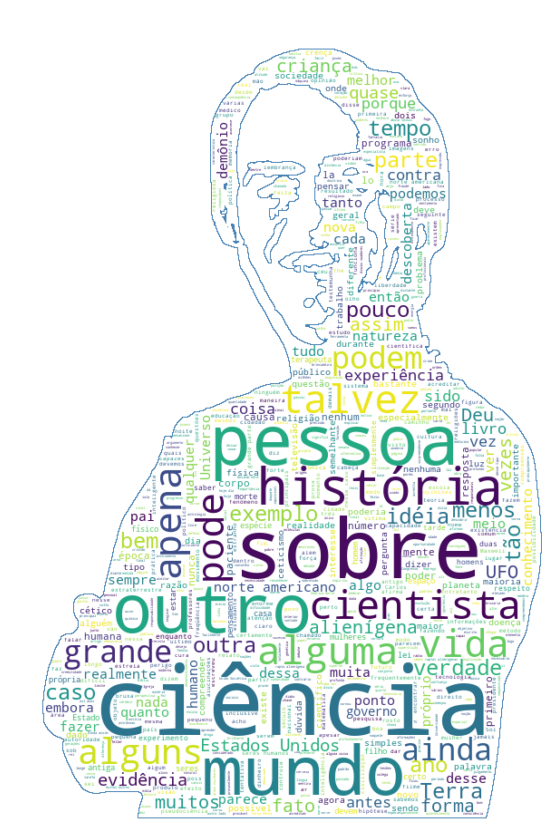


-------------------------------------------------------------------------------
Mask image name : images_mask/carl_sagan_03.png


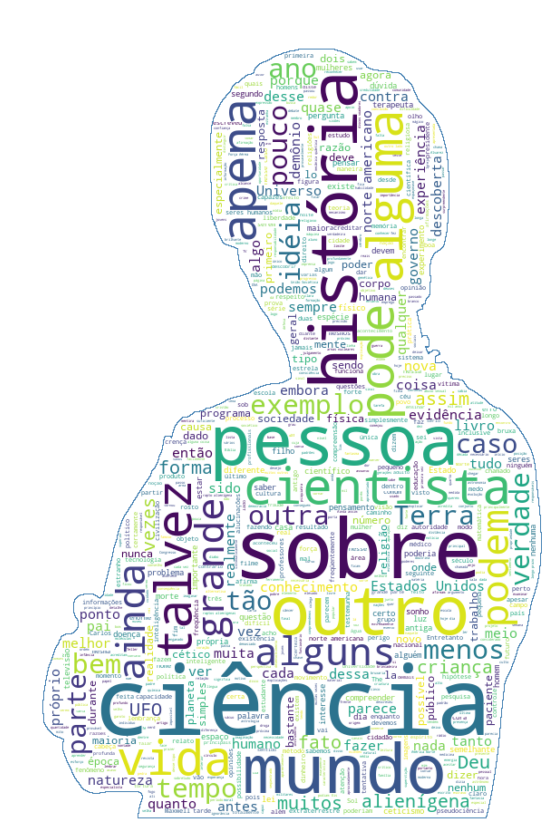


-------------------------------------------------------------------------------
Mask image name : images_mask/carl_sagan_01.png


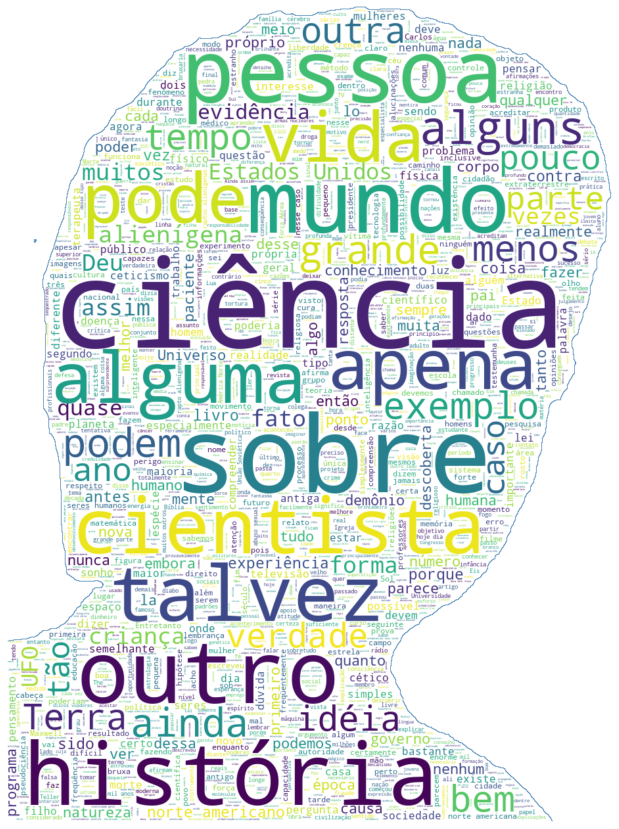


-------------------------------------------------------------------------------
Mask image name : images_mask/carl_sagan_04.png


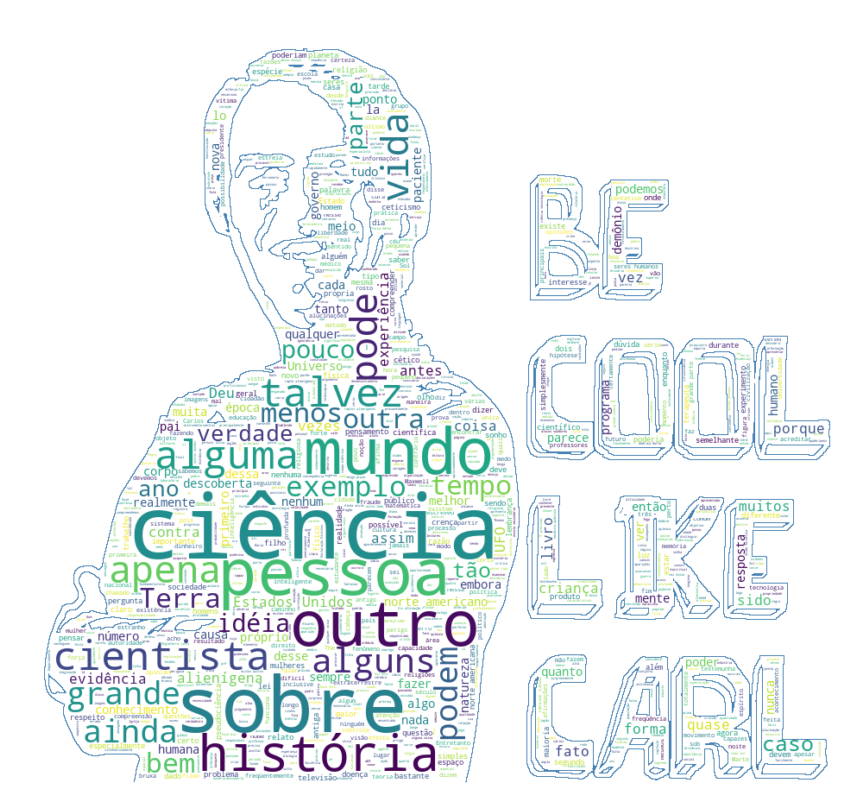


-------------------------------------------------------------------------------


In [20]:
# Generate wordcloud by images mask
for img in images_mask_list:
    print('Mask image name : {}'.format(img))
    img_mask = np.array(Image.open(img))
    show_wordcloud(text,stopwords,img_mask, img.split('/')[-1])
    print('\n{}'.format(str().center(len(img) + 50, '-')))